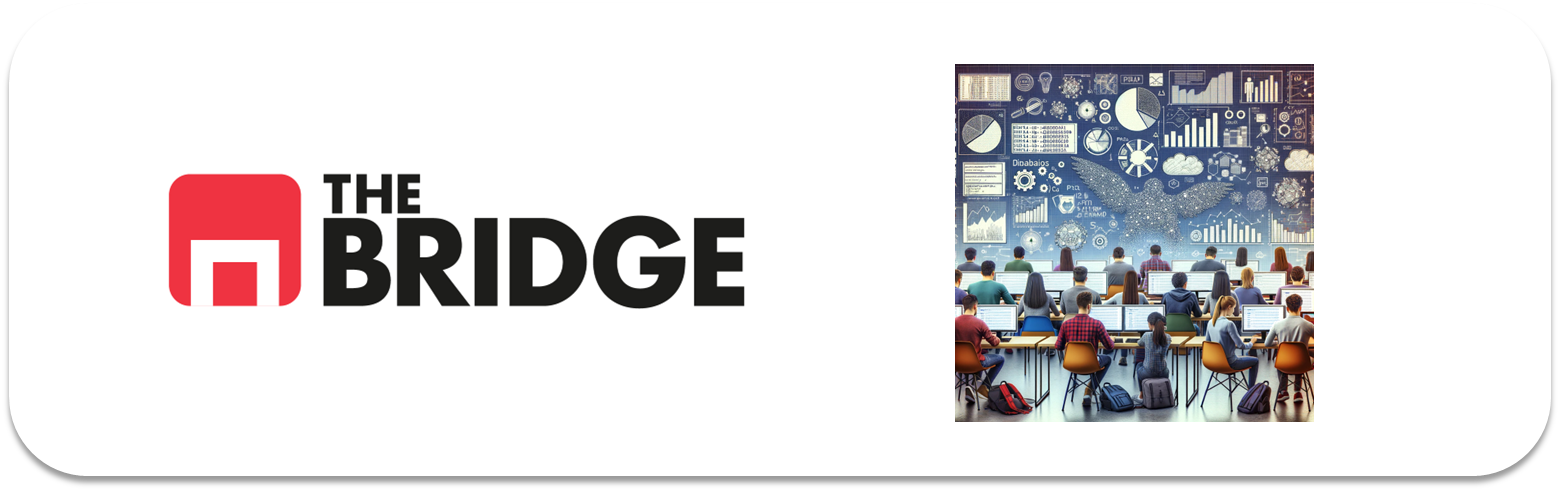

## TEAM CHALLENGE: TOOLBOX (I)

Este notebook describe la primera parte del team challenge dedicado a construir un módulo de herramientas básicas para poder preparar la creación de modelos de Machine Learning de una forma más sencilla. 

En esta primera parte, el grupo debe crear un conjunto de funciones que se describen a continuación y crear con ellas un módulo en script "toolbox_ML.py".

Este módulo se empleará en la segunda parte del challenge para resolver un problema de Machine Learning.

### Entregables
Por lo tanto, **se pide:**  
**1. Entregar un script "toolbox_ML.py" que contenga el código comentado que implemente las funciones descritas y especificadas en el apartado [fuciones]. La entrega se hará en el repositorio del grupo.**  
**2. Hacer una descripción del código creado en una breve presentación de 10-15 minutos, empleando para ello un ejemplo diseñado por el grupo**  
**3. Entregar el código del ejemplo (esto debería ser un notebook, pero puede ser también un script) también en el repositorio del grupo**  

### Plazos
Tendremos 2 sesiones de team challenge para crear el código y una sesión de presentación.  
Debéis entregar en enlace al repositorio via mail a ta_ds2_online@thebridgeonline.es el día anterior a la presentación (hora límite 17:00h)
- Turno de mañana: Entrega 28 de enero / Presentación 29 de enero
- Turno de tarde: Entrega 30 de enero / Presentación 31 de enero



### Funciones

El objetivo de las funciones que se especifican a continuación es ayudar a realizar el análisis y selección de features de la forma más flexible y rápida posible, dado un problema de Machine Learning concreto.

**Todas las funciones deben llevar comentado el código y deben incluir un docstring especificando su uso**, según la siguiente guía:

Un "docstring" en Python es una cadena de texto utilizada para documentar módulos, clases, métodos y funciones. El propósito de un docstring es explicar brevemente qué hace la función y cómo se debe utilizar. Los docstrings se encierran entre tres comillas dobles (""") al inicio y al final, y se colocan justo después de la definición de la función. Aquí hay un formato típico de un docstring para una función en Python:

```python
def mi_funcion(param1, param2):
    """
    Descripción breve de lo que hace la función.

    Argumentos:
    param1 (tipo): Descripción de param1.
    param2 (tipo): Descripción de param2.

    Retorna:
    tipo: Descripción de lo que retorna la función.
    """
    
    # El cuerpo de la función va aquí
    pass
```

En este formato:

1. **Primera línea**: Breve descripción de la función.
2. **Sección de Argumentos**: Lista cada parámetro, su tipo esperado y una breve descripción de su propósito.
3. **Sección de Retorna**: Describe el tipo y el propósito del valor que la función retorna.



In [29]:
# Importar librerias para manipulacion de datos
import pandas as pd
import numpy as np

# Importar librerias para analisis de datos
from scipy.stats import pearsonr
from scipy.stats import f_oneway, kruskal, ttest_ind, mannwhitneyu

# Importar librerias para visualizacion
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Importar dataset de prueba
df = pd.read_csv("./data/CarPrice_Assignment.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [31]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Funcion: describe_df

Esta función debe recibir como argumento un dataframe y debe devolver una dataframe como el de la imagen (no el de la imagen). Es decir un dataframe que tenga una columna por cada columan del dataframe original y como filas, los tipos de las columnas, el tanto por ciento de valores nulos o missings, los valores únicos y el porcentaje de cardinalidad. 

La figura muestra el resultado esperado de llamar a la función pedida con el dataset del titanic:
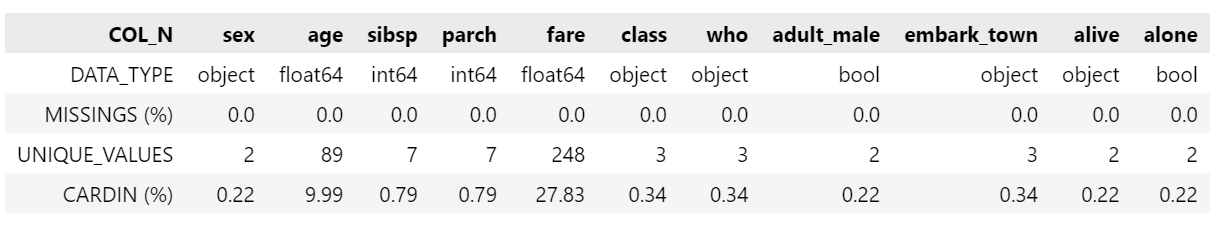
    

In [32]:
def describe_df(df):
    
    """
    La función hace un breve resumen de las variables de un dataset, obteniendo datos relevantes para el posterior analisis
    Tipo de dato, Suma de valores nulos, valores únicos y cardinalidad.
    
    Argumentos:
    df (pd.DataFrame): DataFrame con los datos a analizar
    
    Retorna
    summary (pd.DataFrame): DataFrame con los valores para cada variable (Tipo de dato, % valores Nulos, Valores únicos, cardinalidad)
    """   
    
    # Crear un diccionario para almacenar los resultados
    resumen_datos = {
        "DATE_TYPE": df.dtypes.astype(str),
        "MISSINGS(%)": (df.isnull().mean() * 100).round(2),
        "UNIQUE_VALUES": df.nunique(),
        "CARDIN(%)": ((df.nunique() / len(df)) * 100).round(2)
    }
    
    # Convertir el diccionario en un DataFrame y transponerlo
    summary = pd.DataFrame(resumen_datos).T

    # Renombrar el índice como 'COL_N'
    summary.columns.name = 'COL_N'
    
    return summary

In [33]:
# Prueba de la función
describe_df(df)

COL_N,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
DATE_TYPE,int64,int64,object,object,object,object,object,object,object,float64,...,int64,object,float64,float64,float64,int64,int64,int64,int64,float64
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,205,6,147,2,2,2,5,3,2,53,...,44,8,38,37,32,59,23,29,30,189
CARDIN(%),100.0,2.93,71.71,0.98,0.98,0.98,2.44,1.46,0.98,25.85,...,21.46,3.9,18.54,18.05,15.61,28.78,11.22,14.15,14.63,92.2


### Funcion: tipifica_variables

Esta función debe recibir como argumento un dataframe, un entero (`umbral_categoria`) y un float (`umbral_continua`). La función debe devolver un dataframe con dos columnas "nombre_variable", "tipo_sugerido" que tendrá tantas filas como columnas el dataframe. En cada fila irá el nombre de una de las columnas y una sugerencia del tipo de variable. Esta sugerencia se hará siguiendo las siguientes pautas:
+ Si la cardinalidad es 2, asignara "Binaria"
+ Si la cardinalidad es menor que `umbral_categoria` asignara "Categórica"
+ Si la cardinalidad es mayor o igual que `umbral_categoria`, entonces entra en juego el tercer argumento:
    * Si además el porcentaje de cardinalidad es superior o igual a `umbral_continua`, asigna "Numerica Continua"
    * En caso contrario, asigna "Numerica Discreta"


In [34]:
def tipifica_variables(df, umbral_categoria=10, umbral_continua=30):
    """
    La función hace una tipificación de las variables de un dataset, obteniendo datos relevantes para el posterior análisis.

    Argumentos:
    df (pd.DataFrame): DataFrame con los datos a analizar.
    umbral_categoria (int): Valor de cardinalidad a partir del cual se considera una variable categórica.
    umbral_continua (int): Porcentaje de cardinalidad a partir del cual se considera una variable continua.

    Retorna:
    pd.DataFrame: DataFrame con los nombres de las variables, el tipo de variable sugerido en función de la cardinalidad
                  y el porcentaje de variación de la misma, además del dtype original de cada variable.
    """
    # Preparar el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_tip = pd.DataFrame({
        'nombre_variable': df.columns,
        'Card': df.nunique(),
        '%_Card': df.nunique() / len(df) * 100,
        'dtype': df.dtypes.astype(str)
    })

    # Corrección para cuando solo tengo un valor
    df_tip.loc[df_tip['Card'] == 1, '%_Card'] = 0.00

    # Crear la columna de sugerencia de tipo de variable
    df_tip['tipo_sugerido'] = 'Categorica'
    df_tip.loc[df_tip['Card'] == 2, 'tipo_sugerido'] = 'Binaria'
    df_tip.loc[df_tip['Card'] >= umbral_categoria, 'tipo_sugerido'] = 'Numerica discreta'
    df_tip.loc[df_tip['%_Card'] >= umbral_continua, 'tipo_sugerido'] = 'Numerica continua'

    # Eliminar las columnas auxiliares que no me interesan
    df_tip = df_tip.reset_index().drop(['Card', '%_Card','COL_N'], axis=1)

    return df_tip


In [35]:
# Prueba de la función
tipifica_variables(df,10,30)

,nombre_variable,dtype,tipo_sugerido
0,car_ID,int64,Numerica continua
1,symboling,int64,Categorica
2,CarName,object,Numerica continua
3,fueltype,object,Binaria
4,aspiration,object,Binaria
5,doornumber,object,Binaria
6,carbody,object,Categorica
7,drivewheel,object,Categorica
8,enginelocation,object,Binaria
9,wheelbase,float64,Numerica discreta


### Funcion: get_features_num_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad, además de un argumento 'umbral_corr', de tipo float que debe estar entre 0 y 1 y una variable float "pvalue" cuyo valor debe ser por defecto "None".

La función debe devolver una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr". Además si la variable "pvalue" es distinta de None, sólo devolvera las columnas numéricas cuya correlación supere el valor indicado y además supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [36]:
def get_features_num_regression(df, target_col, umbral_corr, pvalue=None):
    """
    Filtra las columnas numéricas de un DataFrame según su correlación con una columna objetivo que debe ser numérica continua.

    Argumentos:
        df (pd.DataFrame): DataFrame que contiene los datos.
        target_col (str): Nombre de la columna objetivo que debe ser numérica y continua.
        umbral_corr (float): Valor entre 0 y 1 que indica el umbral mínimo de correlación en valor absoluto.
        pvalue (float, optional): Valor entre 0 y 1. Si se especifica, las columnas también deben pasar un 
                                  test de hipótesis con un p-valor mayor o igual a (1 - pvalue).

    Retorna:
        pd.DataFrame: Un DataFrame con las columnas seleccionadas, sus valores absolutos de correlación y los p-valores,
                      ordenados de mayor a menor por la correlación absoluta.
               Si algún argumento no es válido, devuelve None e imprime un mensaje de error.
    """
    # Comprobaciones iniciales

    # Verificar si el argumento 'df' es un DataFrame
    if not isinstance(df, pd.DataFrame):
        print("El argumento 'df' no es un DataFrame válido.")
        return None

    # Comprobar si la columna objetivo existe en el DataFrame
    if target_col not in df.columns:
        print(f"La columna '{target_col}' no existe en el DataFrame.")
        return None

    # Comprobar que la columna objetivo es numérica y no es de tipo object ni string
    df_tipo = tipifica_variables(df)
    fila = df_tipo.loc[df_tipo["nombre_variable"] == target_col]
    if fila.empty:
        print(f"La columna '{target_col}' no existe en la salida de tipifica_variables.")
        return None
    tipo_variable = fila["dtype"].values[0]
    if tipo_variable in ["object", "string"]:
        print(f"La columna '{target_col}' es de tipo {tipo_variable} y no es válida como columna objetivo.")
        return None

    # Validar que el umbral de correlación esté en el rango [0, 1]
    if not (0 <= umbral_corr <= 1):
        print("El valor de 'umbral_corr' debe estar entre 0 y 1.")
        return None

    # Validar que el pvalue esté en el rango [0, 1] o sea None
    if pvalue is not None and not (0 <= pvalue <= 1):
        print("El valor de 'pvalue' debe estar entre 0 y 1 o ser None.")
        return None

    # Seleccionar columnas numéricas continuas del DataFrame según tipifica_variables, y que no sean tipo object ni string
    columnas_continuas = df_tipo[(df_tipo["tipo_sugerido"] == "Numerica continua") & (~df_tipo["dtype"].isin(["object", "string"]))]["nombre_variable"].tolist()
    columnas_continuas = [col for col in columnas_continuas if col in df.columns and col != target_col] # Excluir la columna objetivo

    # Diccionario para almacenar las correlaciones y p-valores que cumplen los criterios
    resultados_filtrados = []

    # Iterar sobre cada columna numérica continua
    for col in columnas_continuas:
        # Intentar convertir las columnas a tipo numérico, descartando valores no convertibles
        try:
            target_data = pd.to_numeric(df[target_col], errors='coerce').dropna()
            col_data = pd.to_numeric(df[col], errors='coerce').dropna()

            # Asegurar que ambas columnas tengan suficientes datos para calcular la correlación
            if len(target_data) > 1 and len(col_data) > 1:
                # Calcular correlación y p-valor usando scipy.stats.pearsonr
                correlacion, p_valor = pearsonr(target_data, col_data)

                # Comprobar si la correlación supera el umbral
                if np.abs(correlacion) >= umbral_corr:
                    if pvalue is not None:
                        # Comprobar si el p-valor cumple el criterio
                        if (1 - p_valor) >= (1 - pvalue):
                            resultados_filtrados.append({
                                'variable': col,
                                'correlacion_absoluta': np.abs(correlacion),
                                'p_valor': p_valor
                            })
                    else:
                        # Agregar la columna si no se considera el p-valor
                        resultados_filtrados.append({
                            'variable': col,
                            'correlacion_absoluta': np.abs(correlacion),
                            'p_valor': p_valor
                        })
        except Exception as e:
            print(f"Error al procesar la columna '{col}': {e}")

    # Crear un DataFrame con los resultados ordenados por correlación absoluta
    df_corr = pd.DataFrame(resultados_filtrados)
    if not df_corr.empty:
        df_corr = df_corr.sort_values(by='correlacion_absoluta', ascending=False).reset_index(drop=True)

    # Devolfver el DataFrame con las columnas seleccionadas, correlaciones y p-valores
    return df_corr


In [43]:
# Prueba de la función
get_features_num_regression(df, "price", 0.1, 0.05)


,variable,correlacion_absoluta,p_valor
0,curbweight,0.835305,1.214445e-54
1,carlength,0.682920,1.678707e-29


### Funcion: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

EXTRA: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_regresion`

In [44]:
def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None):
    """
    Genera pairplots basados en la correlación entre una columna objetivo y otras columnas numéricas o seleccionadas.

    Argumentos:
        df (pd.DataFrame): DataFrame que contiene los datos.
        target_col (str): Nombre de la columna objetivo que debe ser numérica y continua.
        columns (list of str): Lista de columnas a evaluar. Si está vacía, se usan todas las columnas numéricas del DataFrame.
        umbral_corr (float): Valor mínimo de correlación en valor absoluto (entre 0 y 1).
        pvalue (float, optional): Valor entre 0 y 1. Si se especifica, las columnas también deben pasar un test 
                                  de hipótesis con un p-valor mayor o igual a (1 - pvalue).

    Retorna:
        list: Lista de nombres de columnas que cumplen los criterios de correlación y p-valor. Si algún argumento no
              es válido, devuelve None e imprime un mensaje de error.
    """
    # Comprobaciones iniciales

    # Verificar si el argumento 'df' es un DataFrame
    if not isinstance(df, pd.DataFrame):
        print("El argumento 'df' no es un DataFrame válido.")
        return None

    # Comprobar si la columna objetivo es válida, porque está en el DataFrame
    if target_col == "" or target_col not in df.columns:
        print("Debe proporcionar una columna objetivo válida en 'target_col'.")
        return None

    # Comprobar que la columna objetivo es numérica continua y no es de tipo object ni string
    df_tipo = tipifica_variables(df)
    fila = df_tipo.loc[df_tipo["nombre_variable"] == target_col]
    if fila.empty:
        print(f"La columna '{target_col}' no existe en la salida de tipifica_variables.")
        return None
    tipo_variable = fila["dtype"].values[0]
    if tipo_variable in ["object", "string"]:
        print(f"La columna '{target_col}' es de tipo {tipo_variable} y no es válida como columna objetivo.")
        return None
    
    # Validar que el umbral de correlación esté en el rango [0, 1]
    if not (0 <= umbral_corr <= 1):
        print("El valor de 'umbral_corr' debe estar entre 0 y 1.")
        return None

    # Validar que el pvalue esté en el rango [0, 1] o sea None
    if pvalue is not None and not (0 <= pvalue <= 1):
        print("El valor de 'pvalue' debe estar entre 0 y 1 o ser None.")
        return None

    # Selección de features numericas
    # Si 'columns' está vacío, considerar todas las columnas numéricas del DataFrame
    if columns == []:    
        columns = df.select_dtypes(include=[np.number]).columns.tolist()
        columns.remove(target_col)

    # Filtrar columnas que cumplan los criterios de correlación y p-value
    columnas_filtradas = []
    for col in columns:
        
        # Comprobar si las columnas especificadas existen en el DataFrame
        if col not in df.columns:
            print(f"La columna '{col}' no existe en el DataFrame. Se ha ignorado.")
            continue

        # Comprobar si la columna es numérica continua según tipifica_variables, y que no es ni object ni string
        fila_col = df_tipo.loc[df_tipo["nombre_variable"] == col]
        if fila_col.empty or fila_col["tipo_sugerido"].values[0] != "Numerica continua" or fila_col["dtype"].values[0] in ["object", "string"]:
            print(f"La columna '{col}' se ha ignorado porque no cumple los requisitos de ser variable numérica continua.")
            continue

        # Calcular correlación y p-valor usando pearsonr
        correlacion, p_valor = pearsonr(df[target_col].dropna(), df[col].dropna())

        # Comprobar correlación y p-value
        if np.abs(correlacion) >= umbral_corr:
            if pvalue is not None:
                if (1-p_valor) >= (1 - pvalue):
                    columnas_filtradas.append(col)
            else:
                columnas_filtradas.append(col)

    # Generar pairplots en grupos de máximo 5 columnas
    max_columns = 5
    for i in range(0, len(columnas_filtradas), max_columns - 1):
        subset = [target_col] + columnas_filtradas[i:i + max_columns - 1]
        sns.pairplot(
            df[subset].dropna(), 
            kind='reg', 
            diag_kind='kde', 
            plot_kws={'scatter_kws': {'alpha': 0.5}, 'line_kws': {'color': 'red'}}
        )
        plt.show()

    return columnas_filtradas

La columna 'wheelbase' se ha ignorado porque no cumple los requisitos de ser variable numérica continua.
La columna 'carwidth' se ha ignorado porque no cumple los requisitos de ser variable numérica continua.
La columna 'carheight' se ha ignorado porque no cumple los requisitos de ser variable numérica continua.


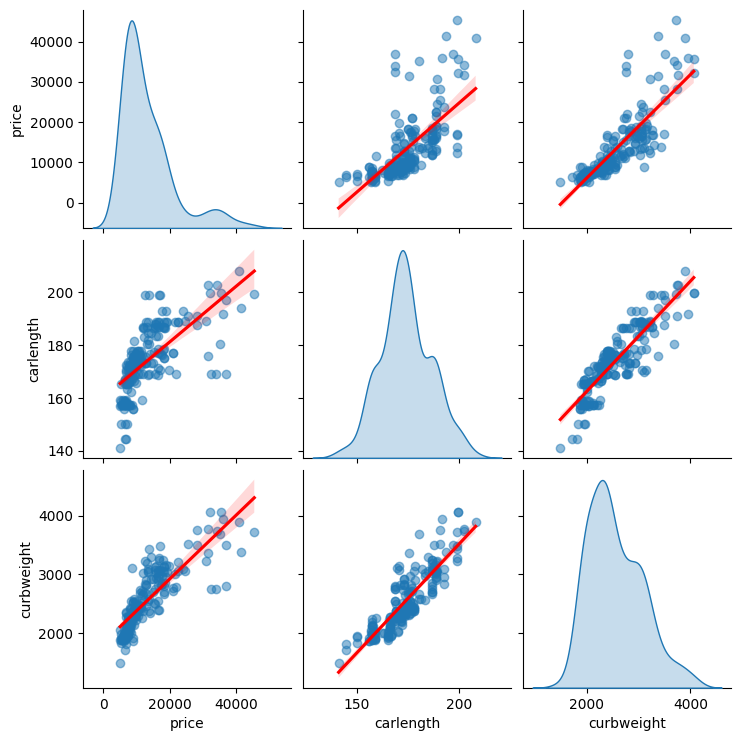

['carlength', 'curbweight']

In [45]:
# prueba de la función
plot_features_num_regression(df, "price", columns=["wheelbase", "carlength", "carwidth", "carheight", "curbweight"], umbral_corr=0.1, pvalue=0.05)

### Funcion: get_features_cat_regression



Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad y una variable float "pvalue" cuyo valor por defecto será 0.05.

La función debe devolver una lista con las columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer (es decir la función debe poder escoger cuál de los dos test que hemos aprendido tiene que hacer).

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [46]:
def get_features_cat_regression(df, target_col, pvalue=0.05, normal_distribution=False):
    """
    Selecciona columnas categóricas relacionadas con la columna objetivo según pruebas estadísticas.

    Argumentos:
        df (pd.DataFrame): DataFrame con los datos.
        target_col (str): Nombre de la columna objetivo. Debe ser numérica continua.
        pvalue (float): Valor de corte para el test estadístico. Valor por defecto: 0.05.
        normal_distribution (bool): Indica si la variable objetivo tiene distribución normal. Valor por defecto: False.

    Retorna:
        list: Lista de columnas categóricas relacionadas estadísticamente con la columna objetivo.
              Si algún argumento no es válido, devuelve None e imprime un mensaje de error.
    """
    # Comprobaciones iniciales
    if not isinstance(df, pd.DataFrame):
        print("El argumento 'df' no es un DataFrame válido.")
        return None

    # Verificar si la columna objetivo está en el DataFrame
    if target_col not in df.columns:
        print(f"La columna objetivo '{target_col}' no está en el DataFrame.")
        return None

    # Verificar que target_col sea numérica continua, según tipifica_variables, y no sea de tipo object ni string
    df_tipo = tipifica_variables(df)
    fila = df_tipo.loc[df_tipo["nombre_variable"] == target_col]
    if fila.empty:
        print(f"La columna '{target_col}' no existe en la salida de tipifica_variables.")
        return None
    tipo_variable = fila["dtype"].values[0]
    if tipo_variable in ["object", "string"]:
        print(f"La columna '{target_col}' es de tipo {tipo_variable} y no es válida como columna objetivo.")
        return None

    # Filtrar columnas categóricas
    categoricas = df.select_dtypes(include=["object", "category"]).columns.tolist()
    if not categoricas:
        print("No se encontraron columnas categóricas en el DataFrame.")
        return []

    # Lista para almacenar las columnas que pasan el test estadístico
    columnas_significativas = []

    for col in categoricas:
        # Verificar si la columna categórica tiene al menos 2 categorías
        if df[col].nunique() < 2:
            print(f"La columna '{col}' tiene menos de 2 categorías y no se considerará.")
            continue

        # Crear grupos basados en la variable categórica
        grupos = [df[target_col][df[col] == cat].dropna() for cat in df[col].unique()]

        # Verificar si los grupos tienen suficientes datos
        if any(len(grupo) < 2 for grupo in grupos):
            print(f"La columna '{col}' tiene categorías con datos insuficientes y no se considerará.")
            continue

        # Seleccionar el test estadístico según el número de categorías
        try:
            if len(grupos) == 2:
                if normal_distribution:
                    # Prueba t para variables binarias si la distribución es normal
                    estadistico, p_valor = ttest_ind(grupos[0], grupos[1])
                else:
                    # Prueba de Mann-Whitney U si la distribución no es normal
                    estadistico, p_valor = mannwhitneyu(grupos[0], grupos[1], alternative='two-sided')
            elif len(grupos) > 2:
                # ANOVA para más de dos categorías si la distribución es normal
                estadistico, p_valor = f_oneway(*grupos)
        except ValueError:
            # Si ANOVA falla (posiblemente por normalidad), intentar Kruskal-Wallis
            estadistico, p_valor = kruskal(*grupos)

        # Comprobar si el p-valor cumple con el umbral
        if p_valor <= pvalue:
            columnas_significativas.append(col)
        else:
            print(f"La columna '{col}' no supera el test estadístico (p-valor = {p_valor:.3f}).")

    return columnas_significativas

In [40]:
# prueba de la función  
get_features_cat_regression(df, "price", 0.05, normal_distribution=False)

La columna 'CarName' tiene categorías con datos insuficientes y no se considerará.
La columna 'doornumber' no supera el test estadístico (p-valor = 0.091).
La columna 'enginetype' tiene categorías con datos insuficientes y no se considerará.
La columna 'cylindernumber' tiene categorías con datos insuficientes y no se considerará.
La columna 'fuelsystem' tiene categorías con datos insuficientes y no se considerará.


['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation']

### Funcion: plot_features_cat_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("pvalue") con valor 0.05 por defecto y un argumento "with_individual_plot" a False.

Si la lista no está vacía, la función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_regression`.

In [50]:
def plot_features_cat_regression(df, target_col="", columns=[], pvalue=0.05, with_individual_plot=False, normal_distribution=False):
    """
    Genera histogramas agrupados de la variable "target_col" para cada una de las variables categóricas
    que cumplen el criterio de significación estadística.

    Argumentos:
        df (pd.DataFrame): DataFrame con los datos.
        target_col (str): Nombre de la columna objetivo. Debe ser numérica continua.
        columns (list of str): Lista de columnas categóricas a evaluar. Si está vacía, se usarán todas las categóricas.
        pvalue (float): Nivel de significación estadística. Valor por defecto: 0.05.
        with_individual_plot (bool): Si es True, genera histogramas individuales para cada columna significativa.
        normal_distribution (bool): Indica si la variable objetivo tiene distribución normal. Valor por defecto: False.

    Retorna:
        list: Lista de columnas categóricas que cumplen el criterio de significación estadística.
    """
    # Comprobaciones iniciales
    if not isinstance(df, pd.DataFrame):
        print("El argumento 'df' no es un DataFrame válido.")
        return None

    # Verificar si la columna objetivo está en el DataFrame
    if target_col not in df.columns:
        print(f"La columna objetivo '{target_col}' no está en el DataFrame.")
        return None

    # Verificar que target_col sea numérica continua, según tipifica_variables, y no sea de tipo object ni string
    df_tipo = tipifica_variables(df)
    fila = df_tipo.loc[df_tipo["nombre_variable"] == target_col]
    if fila.empty:
        print(f"La columna '{target_col}' no existe en la salida de tipifica_variables.")
        return None
    tipo_variable = fila["dtype"].values[0]
    if tipo_variable in ["object", "string"]:
        print(f"La columna '{target_col}' es de tipo {tipo_variable} y no es válida como columna objetivo.")
        return None

    # Si 'columns' está vacío, seleccionar todas las columnas categóricas
    if not columns:
        columns = df.select_dtypes(include=["object", "category"]).columns.tolist()

    # Comprobar si hay columnas categóricas
    if not columns:
        print("No se encontraron columnas categóricas en el DataFrame.")
        return []

    # Filtrar columnas significativas
    columnas_significativas = []

    for col in columns:
        # Verificar si la columna categórica tiene al menos 2 categorías
        if df[col].nunique() < 2:
            print(f"La columna '{col}' tiene menos de 2 categorías y no se considerará.")
            continue

        # Crear grupos basados en la variable categórica
        grupos = [df[target_col][df[col] == cat].dropna() for cat in df[col].unique()]

        # Verificar si los grupos tienen suficientes datos
        if any(len(grupo) < 2 for grupo in grupos):
            print(f"La columna '{col}' tiene categorías con datos insuficientes y no se considerará.")
            continue

        # Seleccionar el test estadístico
        try:
            if len(grupos) == 2:
                if normal_distribution:
                    # Prueba t para variables binarias si la distribución es normal
                    estadistico, p_valor = ttest_ind(grupos[0], grupos[1])
                else:
                    # Prueba de Mann-Whitney U si la distribución no es normal
                    estadistico, p_valor = mannwhitneyu(grupos[0], grupos[1], alternative='two-sided')
            else:
                if normal_distribution:
                    # ANOVA para datos con distribución normal
                    estadistico, p_valor = f_oneway(*grupos)
                else:
                    # Kruskal-Wallis para datos sin distribución normal
                    estadistico, p_valor = kruskal(*grupos)
        except ValueError:
            print(f"La columna '{col}' no pudo ser evaluada debido a problemas en los datos.")
            continue

        # Comprobar si el p-valor cumple con el umbral
        if p_valor <= pvalue:
            columnas_significativas.append(col)

    # Generar gráficos solo para las columnas significativas
    if with_individual_plot:
        for col in columnas_significativas:
            plt.figure(figsize=(10, 6))
            for valor in df[col].unique():
                sns.histplot(df.loc[df[col] == valor,target_col], kde= True, label=valor,bins=40)
 
            plt.title(f"Histograma de {target_col} agrupado por {col} (p-valor = {p_valor:.3f})")
            plt.xlabel(target_col)
            plt.ylabel("Frecuencia")
            plt.legend();  
            plt.show()
     
    else:
        num_plots = len(columnas_significativas)
        if num_plots > 0:
            num_cols = 2
            num_rows = (num_plots + 1) // num_cols

            fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
            axes = axes.flatten()

            for i, col in enumerate(columnas_significativas):
                for valor in df[col].unique():
                    sns.histplot(df.loc[df[col] == valor,target_col], kde= True, label=valor, ax=axes[i],bins=40)
                axes[i].set_title(f"Histograma de {target_col} agrupado por {col} (p-valor = {p_valor:.3f})")
                axes[i].set_xlabel(target_col)
                axes[i].set_ylabel("Frecuencia")
                axes[i].legend()

            # Eliminar axes no utilizados
            for j in range(i + 1, len(axes)):
                fig.delaxes(axes[j])

            plt.tight_layout()
            plt.show()

    return columnas_significativas


La columna 'CarName' tiene categorías con datos insuficientes y no se considerará.
La columna 'enginetype' tiene categorías con datos insuficientes y no se considerará.
La columna 'cylindernumber' tiene categorías con datos insuficientes y no se considerará.
La columna 'fuelsystem' tiene categorías con datos insuficientes y no se considerará.


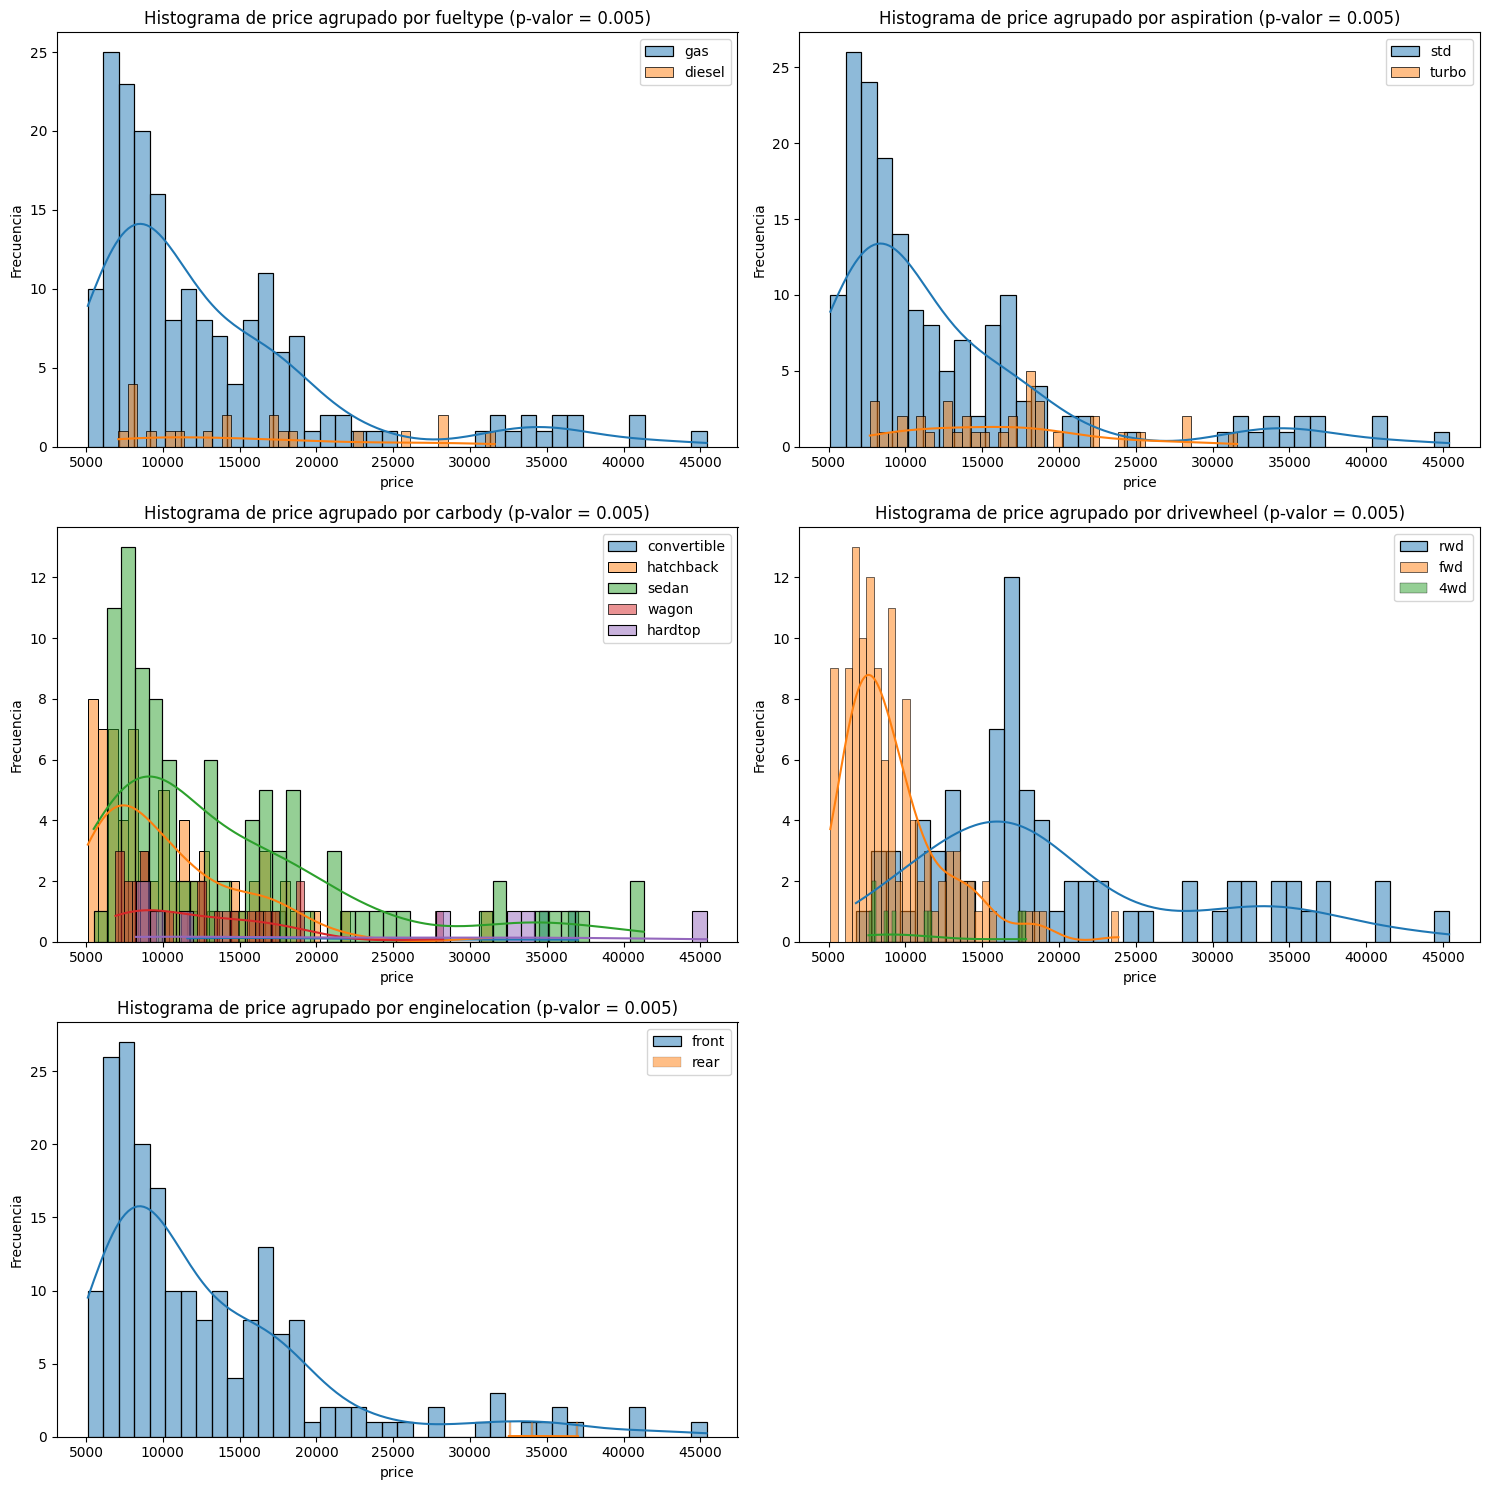

['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation']

In [51]:
# prueba de la función
plot_features_cat_regression(df, "price", columns=[], pvalue=0.05, with_individual_plot=False, normal_distribution=False)

### Consejos para la distribución del trabajo

Tened en cuenta que hay realmente dos trabajos: desarrollo de las funciones, desarrollo del ejemplo.

Diseñad entre todos el ejemplo (puede ser un dataset conocido al que vais a aplicar todas las funciones, en cuyo caso deberías ir saber que debería devolver cada función). Basícamente esto sería diseñar lo que se conocen como "Test" de las funciones.function

Encargad a uno el desarrollo y ejecución del test y el resto repartíos las funciones. A medida que vayáis teniendo las funciones hechas avisad al "testador" para que pueda ir probándolas y dando feedback. El testador mientras las funciones llegan puede diseñar el esqueleto y unas funciones dummies que se llamen igual que las pedidas y que devuelvan siempre un mismo resultado (ojo un resultado válido para lo que se le pide a cada función)

